In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [131]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


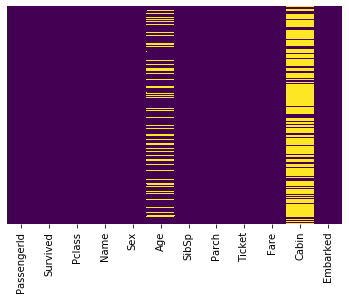

In [5]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [6]:
sns.set_style('whitegrid')

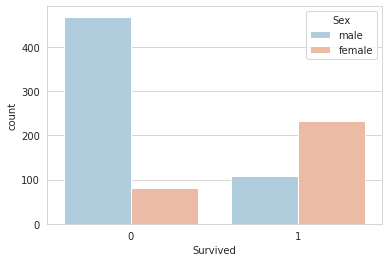

In [7]:
sns.countplot(x='Survived', hue='Sex', palette='RdBu_r', data=train)

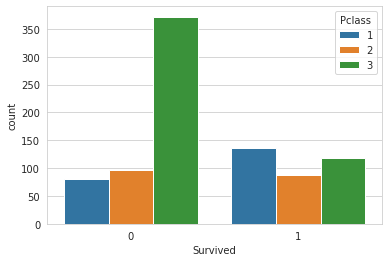

In [8]:
sns.countplot(x='Survived', hue='Pclass', data=train)

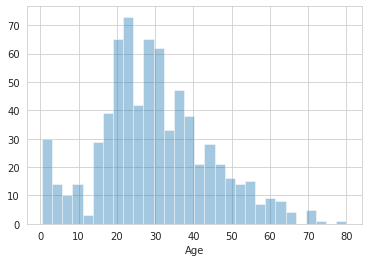

In [9]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

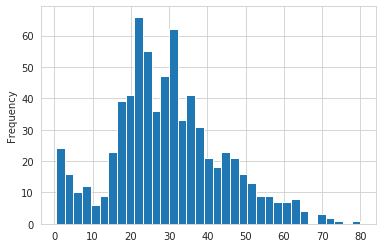

In [10]:
train['Age'].plot.hist(bins=35)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


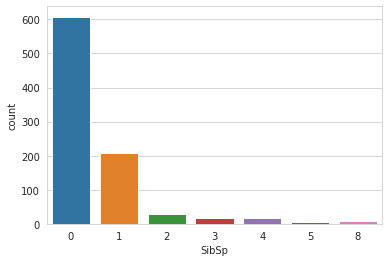

In [12]:
sns.countplot(x='SibSp', data=train)

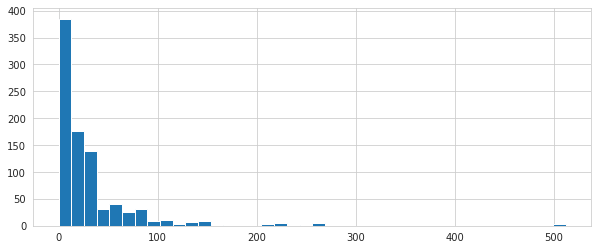

In [13]:
train['Fare'].hist(bins=40, figsize=(10,4))

In [14]:
import cufflinks as cf

In [15]:
cf.go_offline()

In [16]:
train['Fare'].iplot(kind='hist', bins=30)

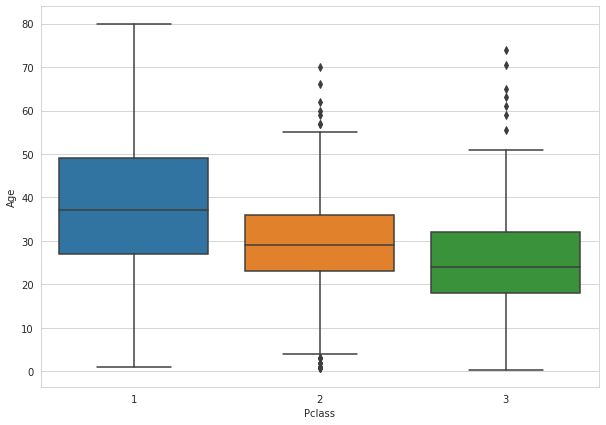

In [18]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [22]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [132]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

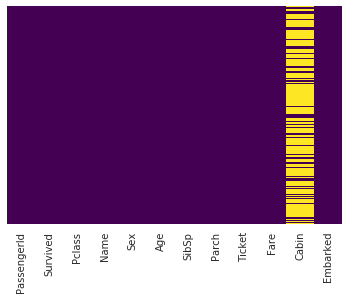

In [24]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [133]:
train.drop('Cabin', axis=1, inplace=True)

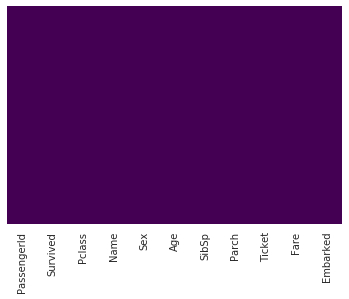

In [30]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [134]:
train.dropna(inplace=True)

In [135]:
# drop_first avoids colinearity problem that will mess up ML algo
# don't want columns to be perfect predictors of one another
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [136]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [38]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [137]:
train = pd.concat([train, sex, embark], axis=1)

In [138]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [139]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], inplace=True, axis=1)

In [140]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [141]:
train.drop('PassengerId', axis=1, inplace=True)

In [142]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [143]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [48]:
from sklearn.model_selection import train_test_split

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [50]:
from sklearn.linear_model import LogisticRegression

In [145]:
logmodel = LogisticRegression()

In [146]:
logmodel.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [147]:
predictions = logmodel.predict(X_test)

In [54]:
from sklearn.metrics import classification_report

In [148]:
# https://muthu.co/understanding-the-classification-report-in-sklearn/

# Precision – Accuracy of positive predictions.
# Precision = TP/(TP + FP)
# Precision is the ability of a classifier not to label an instance positive that is actually negative

# Recall: Fraction of positives that were correctly identified.
# Recall = TP/(TP+FN)
# Recall is the ability of a classifier to find all positive instances.



print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



In [56]:
from sklearn.metrics import confusion_matrix

In [57]:
confusion_matrix(y_test, predictions)

array([[148,  15],
       [ 36,  68]])

In [67]:
# Calculate for each class instead of assuming for positive (i.e. class = 1) globally.  A bit tricky...)

#       0  |  1 
# ---------------
# 0 | 148  |  15
# 1 | 36   |  68
#

print(f"Precision dead: TP/(TP+FP) --> 148/(148+38): {148/(148+36)}")
print(f"Recall dead:    TP/(TP+FN) --> 148/(148+15): {148/(148+15)}")
print("------------------------------------------------------------")
print(f"Precision survived: TP/(TP+FP) --> 68/(68+15) {68/(68+15)}")
print(f"Recall survived:    TP/(TP+FN) --> 68/(68+36) {68/(68+36)}")

Precision dead: TP/(TP+FP) --> 148/(148+38): 0.8043478260869565
Recall dead:    TP/(TP+FN) --> 148/(148+15): 0.9079754601226994
------------------------------------------------------------
Precision survived: TP/(TP+FP) --> 68/(68+15) 0.8192771084337349
Recall survived:    TP/(TP+FN) --> 68/(68+36) 0.6538461538461539


In [317]:
def impute_fare(cols, avg_by_class):
    Fare = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Fare):
        return avg_by_class.loc[Pclass,'Fare']
    else:
        return Fare

In [318]:
def impute_age_v2(cols, avg_by_class):
    Age = cols[0]
    Pclass = cols[1]
    
    if(pd.isnull(Age)):
        return avg_by_class.loc[Pclass,'Age']
    else:
        return Age

In [319]:
def prep_data(df, test=False):
    # Order of operations is important to understand outcome:
    # https://stackoverflow.com/questions/38895768/python-pandas-dataframe-is-it-pass-by-value-or-pass-by-reference
    sex = pd.get_dummies(df['Sex'],drop_first=True)
    embark = pd.get_dummies(df['Embarked'], drop_first=True, prefix='embark')
    avg_by_class = df[['Pclass', 'Fare', 'Age']].groupby(['Pclass']).mean()
    
    # Creates a new internal copy of df
    df = pd.concat([df, sex, embark], axis=1)
    df.set_index('PassengerId', inplace=True)
    df.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
    df['Age'] = df[['Age', 'Pclass']].apply(impute_age_v2, axis=1, args=(avg_by_class,))
    df['Fare'] = df[['Fare', 'Pclass']].apply(impute_fare, axis=1, args=(avg_by_class,))
    
    # Can only create dummy for Pclass after using it to impute Age
    classes = pd.get_dummies(df['Pclass'], drop_first=True, prefix='class')
    df = pd.concat([df, classes], axis=1)
    df.drop('Pclass', axis=1, inplace=True)
    
    if(not test):
        df.dropna(inplace=True)

    return df

In [320]:
train_v2 = pd.read_csv('titanic_train.csv')

In [321]:
avg_by_class = train_v2[['Pclass', 'Fare', 'Age']].groupby(['Pclass']).mean()
avg_by_class.head()

,Fare,Age
Pclass,,
1,84.154687,38.233441
2,20.662183,29.877630
3,13.675550,25.140620


In [322]:
avg_by_class.loc[3,'Age']

25.14061971830986

In [323]:
train_v2 = prep_data(train_v2)

In [324]:
train_v2.head()

,Survived,Age,SibSp,Parch,Fare,male,embark_Q,embark_S,class_2,class_3
PassengerId,,,,,,,,,,
1,0,22.0,1,0,7.2500,1,0,1,0,1
2,1,38.0,1,0,71.2833,0,0,0,0,0
3,1,26.0,0,0,7.9250,0,0,1,0,1
4,1,35.0,1,0,53.1000,0,0,1,0,0
5,0,35.0,0,0,8.0500,1,0,1,0,1


In [325]:
X = train_v2.drop('Survived', axis=1)
y = train_v2['Survived']

In [326]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [327]:
logmodel.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [328]:
predictions = logmodel.predict(X_test)

In [329]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.90      0.83       154
           1       0.82      0.65      0.73       114

    accuracy                           0.79       268
   macro avg       0.80      0.77      0.78       268
weighted avg       0.80      0.79      0.79       268



In [330]:
logmodel.fit(X,y)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [331]:
test_v2 = pd.read_csv('titanic_test.csv')

In [332]:
test_v2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [333]:
test_v2 = prep_data(test_v2, test=True)

In [334]:
test_v2.head()

,Age,SibSp,Parch,Fare,male,embark_Q,embark_S,class_2,class_3
PassengerId,,,,,,,,,
892,34.5,0,0,7.8292,1,1,0,0,1
893,47.0,1,0,7.0000,0,0,1,0,1
894,62.0,0,0,9.6875,1,1,0,1,0
895,27.0,0,0,8.6625,1,0,1,0,1
896,22.0,1,1,12.2875,0,0,1,0,1


In [335]:
test_v2.shape

(418, 9)

In [336]:
test_v2[test_v2.isnull().any(axis=1)]

,Age,SibSp,Parch,Fare,male,embark_Q,embark_S,class_2,class_3
PassengerId,,,,,,,,,


In [337]:
predictions = logmodel.predict(test_v2)

In [246]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [338]:
predictions.shape

(418,)

In [339]:
predictions_out = pd.DataFrame(predictions,index=test_v2.index, columns=['Survived'])
predictions_out.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [341]:
predictions_out.to_csv('titanic_kaggle_test_predictions.csv')